In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import scipy.io
import networkx as nx

### Ejercicios de grafos. Del .mat file de coativation_matrix, realizar los siguientes ejercicios:

- Crear un dataframe con la información del ndarray de coativation_matrix, las columnas deben ser números desde el 1, los índices deben ser iguales a las columnas
- Mostrar el heatmap de coativation_matrix
- Crear un dataframe subconjunto del dataframe anterior que contenga de la fila 10 a la 30 y de la columna 10 a la 30
- Mostrar el heatmap del nuevo dataframe
- Crear el grafo dirigido del nuevo dataframe
- ¿qué nodo tiene más conexiones del nuevo dataset?
- Del dataframe con el array de coactivation_matrix, calcular los quantiles 0.25, 0.5, 0.75 de los valores de los datos (quantiles de las conexiones)
- Filtre el dataframe usando como threshold los quantiles 0.25 y 0.5, cómo queda la matriz de activación filtrada?

In [2]:
def open_mat_file(path):
    mat_json = scipy.io.loadmat(path)
    keys = list(mat_json.keys())
    
    lista = []
    for idx in range(3, len(mat_json.keys())):
        lista.append(mat_json[keys[idx]])
    return mat_json, lista

In [3]:
file_path = r"..\..\BCT\BCT\2019_03_03_BCT\data_and_demos\Coactivation_matrix.mat"

json, (coactivation, coords) = open_mat_file(file_path)
json

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Dec 25 01:14:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484

In [4]:
# Ej 1. Crear un dataframe con la información del ndarray de coativation_matrix
df = pd.DataFrame(data=coactivation, index=range(1, len(coactivation)+1), columns=range(1, len(coactivation)+1))
df

,1,2,3,4,5,6,7,8,9,10,...,629,630,631,632,633,634,635,636,637,638
1,0.000000,0.160714,0.111486,0.000000,0.138095,0.00000,0.000000,0.000000,0.0,0.034351,...,0.0,0.000000,0.0,0.0,0.157676,0.053872,0.049383,0.000000,0.050459,0.101124
2,0.160714,0.000000,0.068259,0.000000,0.042056,0.00000,0.000000,0.000000,0.0,0.036585,...,0.0,0.000000,0.0,0.0,0.119149,0.042105,0.000000,0.000000,0.000000,0.069231
3,0.111486,0.068259,0.000000,0.224199,0.000000,0.00000,0.000000,0.052846,0.0,0.000000,...,0.0,0.047035,0.0,0.0,0.000000,0.161905,0.103943,0.034130,0.000000,0.000000
4,0.000000,0.000000,0.224199,0.000000,0.000000,0.00000,0.039275,0.048035,0.0,0.000000,...,0.0,0.048673,0.0,0.0,0.000000,0.000000,0.075697,0.108787,0.000000,0.000000
5,0.138095,0.042056,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.066079,0.000000,0.000000,0.000000,0.103448,0.053279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,0.053872,0.042105,0.161905,0.000000,0.000000,0.00000,0.000000,0.072650,0.0,0.051195,...,0.0,0.046414,0.0,0.0,0.078498,0.000000,0.196721,0.091255,0.000000,0.000000
635,0.049383,0.000000,0.103943,0.075697,0.000000,0.03876,0.000000,0.000000,0.0,0.000000,...,0.0,0.033019,0.0,0.0,0.057377,0.196721,0.000000,0.111650,0.000000,0.000000
636,0.000000,0.000000,0.034130,0.108787,0.000000,0.00000,0.105839,0.083951,0.0,0.000000,...,0.0,0.053528,0.0,0.0,0.000000,0.091255,0.111650,0.000000,0.000000,0.000000
637,0.050459,0.000000,0.000000,0.000000,0.103448,0.00000,0.000000,0.000000,0.0,0.046729,...,0.0,0.000000,0.0,0.0,0.059361,0.000000,0.000000,0.000000,0.000000,0.097778


<AxesSubplot:>

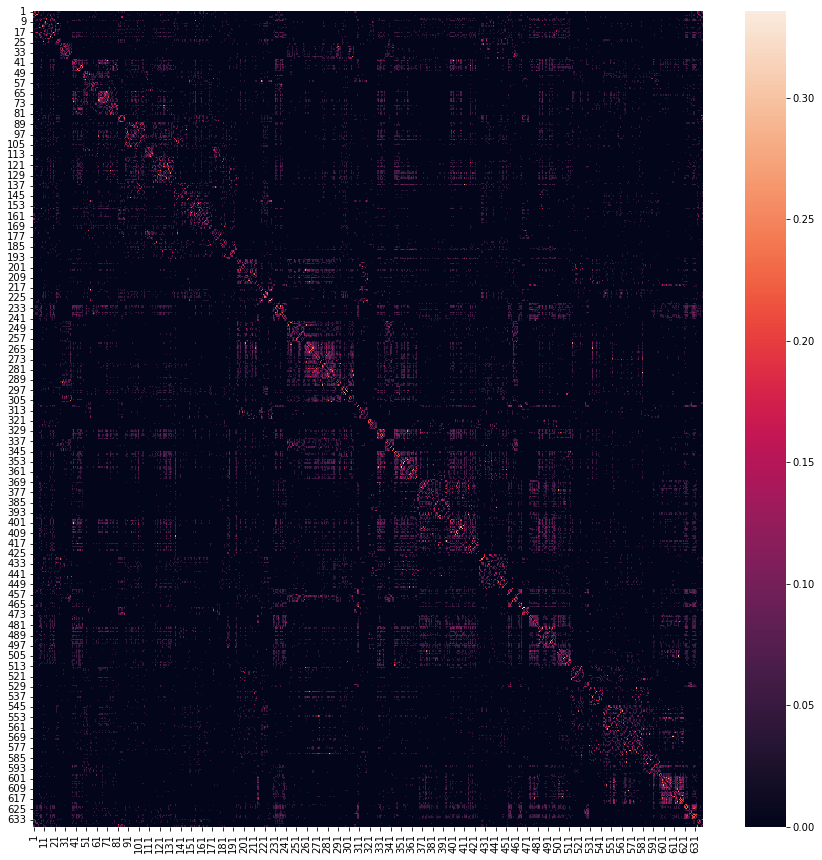

In [5]:
# Ej 2. Mostrar el heatmap de coativation_matrix
fig = plt.figure(figsize=(15, 15))
sns.heatmap(df)

In [6]:
# Ej 3. Crear un dataframe subconjunto del dataframe anterior que contenga de la fila 10 a la 30 y de la columna 10 a la 30
new_df = df.iloc[9: 29, 9:29]
new_df.head()

,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
10,0.000000,0.054299,0.145251,0.000000,0.103286,0.000000,0.000000,0.000000,0.068627,0.000000,0.0,0.0,0.000000,0.044715,0.252381,0.000000,0.040650,0.0,0.0,0.0
11,0.054299,0.000000,0.075000,0.035556,0.000000,0.000000,0.140940,0.000000,0.107784,0.046414,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
12,0.145251,0.075000,0.000000,0.000000,0.000000,0.053435,0.059701,0.000000,0.000000,0.032864,0.0,0.0,0.094488,0.000000,0.000000,0.000000,0.037234,0.0,0.0,0.0
13,0.000000,0.035556,0.000000,0.000000,0.000000,0.000000,0.000000,0.036697,0.033175,0.170833,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
14,0.103286,0.000000,0.000000,0.000000,0.000000,0.043478,0.055215,0.034398,0.087209,0.037344,0.0,0.0,0.090323,0.000000,0.000000,0.046632,0.000000,0.0,0.0,0.0


<AxesSubplot:>

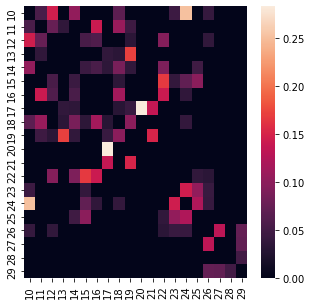

In [16]:
# Ej 4. Mostrar el heatmap del nuevo dataframe
fig = plt.figure(figsize=(5, 5))
sns.heatmap(new_df)

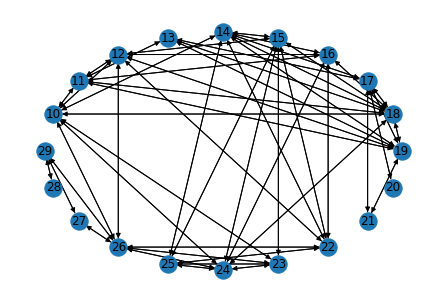

In [8]:
# Ej 5. Crear el grafo dirigido del nuevo dataframe
G = nx.from_pandas_adjacency(new_df, create_using=nx.DiGraph())

nx.draw_shell(G, with_labels=True, arrows=True, arrowstyle='-|>')

In [9]:
# Ej 6. ¿qué nodo tiene más conexiones del nuevo dataset?

# Se calculan las conexiones para cada nodo
tot_conexiones = [sum(new_df.iloc[nodo, :] == 0) for nodo in range(len(new_df))]
# Se encuentra el maximo de conexiones
max_conexiones = max(tot_conexiones)
# Se encuentra cuantos nodos tienen ese número de conexiones
no_nodos_max_conexiones = tot_conexiones.count(max_conexiones)

posicion = tot_conexiones.index(max_conexiones)
nodo_max_conexiones = new_df.columns[posicion]

print('El nodo con más conexiones es', nodo_max_conexiones)

El nodo con más conexiones es 20


In [17]:
max_conexiones

19

In [10]:
new_df.describe()

,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.035461,0.023000,0.024899,0.013813,0.024894,0.025323,0.027445,0.028214,0.030723,0.028990,0.014175,0.014378,0.028151,0.018638,0.035279,0.020432,0.019958,0.010165,0.002439,0.009683
std,0.065544,0.041608,0.041128,0.039122,0.035339,0.044277,0.049229,0.068208,0.041562,0.052002,0.063391,0.044313,0.052081,0.039587,0.066492,0.040168,0.034331,0.032787,0.010908,0.024062
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.047111,0.038270,0.041284,0.000000,0.044267,0.039558,0.041006,0.031559,0.046142,0.038611,0.000000,0.000000,0.033773,0.009563,0.039274,0.009317,0.038088,0.000000,0.000000,0.000000
max,0.252381,0.140940,0.145251,0.170833,0.103286,0.166667,0.141667,0.283495,0.115108,0.170833,0.283495,0.150877,0.166667,0.144144,0.252381,0.121951,0.131868,0.131868,0.048780,0.073446


In [11]:
# Ej 7. Del dataframe con el array de coactivation_matrix, calcular los quantiles 0.25, 0.5, 0.75 
values = new_df.values.flatten()

(array([3.7244e+05, 2.7456e+04, 4.2940e+03, 1.4020e+03, 7.0800e+02,
        3.7800e+02, 2.4200e+02, 8.4000e+01, 3.8000e+01, 2.0000e+00]),
 array([0.        , 0.03355263, 0.06710526, 0.10065789, 0.13421053,
        0.16776316, 0.20131579, 0.23486842, 0.26842105, 0.30197368,
        0.33552632]),
 <BarContainer object of 10 artists>)

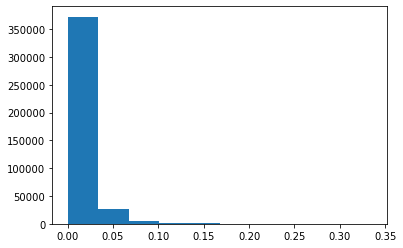

In [18]:
plt.hist(values)

In [12]:
q25 = np.quantile(values, 0.25)
q50 = np.quantile(values, 0.5)
q75 = np.quantile(values, 0.75)
q100 = np.quantile(values, 1.)

print('Los quantiles son ', q25, q50, q75, q100)

Los quantiles son  0.0 0.0 0.03294172618650291 0.283495145631068


(array([3.6985e+05, 1.7298e+04, 1.2748e+04, 3.5060e+03, 1.3840e+03,
        8.0600e+02, 4.9600e+02, 3.7200e+02, 2.1800e+02, 1.8800e+02,
        9.8000e+01, 4.0000e+01, 2.6000e+01, 1.2000e+01, 2.0000e+00]),
 array([0.        , 0.02236842, 0.04473684, 0.06710526, 0.08947368,
        0.11184211, 0.13421053, 0.15657895, 0.17894737, 0.20131579,
        0.22368421, 0.24605263, 0.26842105, 0.29078947, 0.31315789,
        0.33552632]),
 <BarContainer object of 15 artists>)

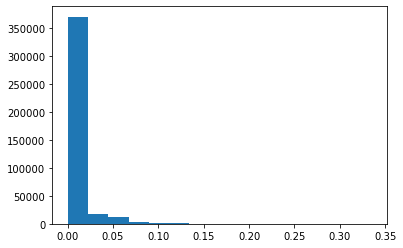

In [13]:
values = df.values.flatten()
plt.hist(values, bins=15)

(array([3.6985e+05, 1.7298e+04, 1.2748e+04, 3.5060e+03, 1.3840e+03,
        8.0600e+02, 4.9600e+02, 3.7200e+02, 2.1800e+02, 1.8800e+02,
        9.8000e+01, 4.0000e+01, 2.6000e+01, 1.2000e+01, 2.0000e+00]),
 array([0.        , 0.02236842, 0.04473684, 0.06710526, 0.08947368,
        0.11184211, 0.13421053, 0.15657895, 0.17894737, 0.20131579,
        0.22368421, 0.24605263, 0.26842105, 0.29078947, 0.31315789,
        0.33552632]),
 <BarContainer object of 15 artists>)

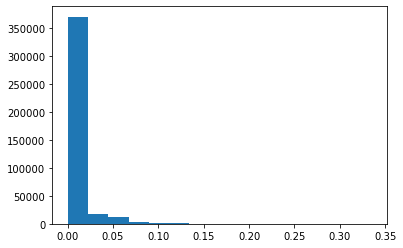

In [14]:
values = df.values.flatten()
plt.hist(values, bins=15)

<AxesSubplot:>

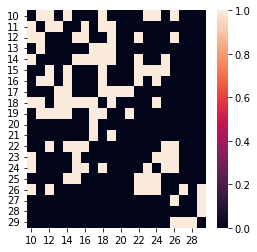

In [19]:
# Ej 8. Filtre el dataframe usando como threshold los quantiles 0.25 y 0.5, cómo queda la matriz de activación filtrada?
filtered_df = new_df > 0
fig = plt.figure(figsize=(4, 4))
sns.heatmap(filtered_df)